## Определение перспективного тарифа для телеком-компании

    «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагаются два тарифных плана: «Смарт» и «Ультра». Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. И понять какой тариф приносит больше денег.

    

**Цель:** ответ на вопрос: Какой тариф приносит больше денег?

**Задачи:**
1. Откройте файл с данными и изучите общую информацию
2. Подготовьте данные
    * приведите данные к нужным типам;
    * найдите и исправьте ошибки в данных, если они есть.
3. Посчитать для каждого пользователя:
    * количество сделанных звонков и израсходованных минут разговора по месяцам;
    * количество отправленных сообщений по месяцам;
    * объем израсходованного интернет-трафика по месяцам;
    * помесячную выручку с каждого пользователя.
4. Проверьте гипотез:
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
    
**Предмет исследования:** выборка данных по 500 пользователям оператора «Мегалайна»

**Методы** которые мы применим в данном исследовании включают в себя: ознакомление, предобработку и статистический анализ данных.

**Структура проекта.** Проектная работа состоит из обзора и предобработки данных, затем следует изучение и статистический анализ данных и общий вывод.

## Открытие файлов с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
display(calls.head(5))
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
display(internet.head(5))
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [5]:
display(messages.head(5))
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
display(tariffs)
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [7]:
display(users.head(5))
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Подготовка данных

### Calls

Проверим на дубликаты:

In [8]:
calls.duplicated().sum()

0

Приведем значения в столбце call_date к типу 'datatime': 

In [9]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [10]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [11]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


### Internet

Проверим на дубликаты:

In [12]:
internet.duplicated().sum()

0

In [13]:
internet = internet.drop(labels='Unnamed: 0', axis=1)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [14]:
display(internet.head(5))
internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


### Messages

Проверим на дубликаты:

In [15]:
messages.duplicated().sum()

0

In [16]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Tariffs

In [18]:
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype('int')
tariffs = tariffs.rename(columns={'mb_per_month_included': "gb_per_month_included"})
tariffs.head(10)

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


### Users

Проверим на дубликаты:

In [19]:
users.duplicated().sum()

0

In [20]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [21]:
display(users.head(10))
users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [22]:
users['age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

In [23]:
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

### Статистики для каждого пользователя:

##### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [24]:
calls['month'] = calls['call_date'].dt.month

In [25]:
user_call_sum = calls.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum'])
user_call_sum = user_call_sum.rename(columns={'count': 'calls_count','sum': 'calls_sum'})\
                             .reset_index()
user_call_sum.head(10)

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


##### Количество отправленных сообщений по месяцам

In [26]:
messages['month'] = messages['message_date'].dt.month
messages.head(10)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [27]:
user_messages_count = calls.groupby(['user_id', 'month'])['id'].agg('count')
user_messages_count = pd.DataFrame(user_messages_count)\
                        .rename(columns={'id': 'messages_sent'})\
                        .reset_index()
user_messages_count.head(10)

,user_id,month,messages_sent
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
5,1000,10,57
6,1000,11,43
7,1000,12,46
8,1001,11,59
9,1001,12,63


##### Объем израсходованного интернет-трафика по месяцам

In [28]:
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [29]:
internet['month'] = internet['session_date'].dt.month
user_internet_sum = internet.groupby(['user_id', 'month'])['mb_used'].agg('sum')
user_internet_sum = pd.DataFrame(user_internet_sum)\
                      .reset_index()
user_internet_sum

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


## Сводный датасет:

Объединим датасеты "user_call_sum", "user_messages_count", "user_internet_sum", "users" в сводную таблицу:

In [68]:
table = user_call_sum.merge(user_messages_count, on=['user_id', 'month'], how='outer')
table = table.merge(user_internet_sum, on=['user_id', 'month'], how='outer')
table = table.merge(users, on='user_id', how='right')
table.head()

,user_id,month,calls_count,calls_sum,messages_sent,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,2253.49,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,43.0,23233.77,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,47.0,14003.64,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,52.0,14055.93,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,58.0,14568.91,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим на пользователей которые не пользовались никакими услугами:

In [69]:
table.query('calls_sum.isnull() & messages_sent.isnull() & mb_used.isnull()')

,user_id,month,calls_count,calls_sum,messages_sent,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
827,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
2335,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Мы обнаружили в датасете 2 человека которые вообще не пользовались ни какими услугами связи, судя по информации из столбца "churn_date" и "reg_date" первый расторг договор после 8 дней от момента заключения а второй через 5 дней, эти строки не несут никакой информации - просто удалим их.

In [70]:
print(len(table))
table = table.dropna(subset=['calls_sum', 'messages_sent', 'mb_used', 'calls_count'], how='all', inplace=False)
print(len(table))

3216
3214


Проверим наш сводный датасет "table" на пропуски:

In [71]:
table.isna().mean()

user_id          0.000000
month            0.000000
calls_count      0.012446
calls_sum        0.012446
messages_sent    0.012446
mb_used          0.003423
age              0.000000
churn_date       0.941817
city             0.000000
first_name       0.000000
last_name        0.000000
reg_date         0.000000
tariff           0.000000
dtype: float64

94 % всех значений из столбца "churn_date" пропущены, "churn_date" - это дата расторжения договора, это означает что в строках в которых не указанна дата расторжения договора находятся данные по пользователям у которых действующий договор на услуги связи - оставим без изменения.

В столбцах "calls_count", "calls_sum", "messages_sent", "mb_used" пропущенные значения заполним на 0, не все абоненты пользуются сообщениями, звонками и интернетом в течении месяца:

In [72]:
table[["calls_count", "calls_sum", "messages_sent", "mb_used"]] = table[["calls_count", "calls_sum",\
                                                                         "messages_sent", "mb_used"]].fillna(0)
table.isna().mean()

user_id          0.000000
month            0.000000
calls_count      0.000000
calls_sum        0.000000
messages_sent    0.000000
mb_used          0.000000
age              0.000000
churn_date       0.941817
city             0.000000
first_name       0.000000
last_name        0.000000
reg_date         0.000000
tariff           0.000000
dtype: float64

## Анализ данных

In [35]:
table['mb_used'] = (table['mb_used'] / 1024).apply(np.ceil)\
                                            .astype('int')

def parametr_tariff(tariff, parametr_name):
    return tariffs.loc[tariffs['tariff_name'] == tariff,[parametr_name]].values[0][0]


def total_income(row):
    total_income = 0
    subscription = 0
    
    subscription = parametr_tariff(row['tariff'], 'rub_monthly_fee')
    lim_gb = parametr_tariff(row['tariff'], 'gb_per_month_included')
    lim_min = parametr_tariff(row['tariff'], 'minutes_included')
    lim_sms = parametr_tariff(row['tariff'], 'messages_included')
    price_gb = parametr_tariff(row['tariff'], 'rub_per_gb')
    price_min = parametr_tariff(row['tariff'], 'rub_per_minute')
    price_sms = parametr_tariff(row['tariff'], 'rub_per_message')  
    
    total_income = subscription
    row['subscription'] = subscription
        
    if row['mb_used'] > lim_gb:
        income = (row['mb_used'] - lim_gb) * price_gb
        total_income += income
        row['internet_income'] = income
    else:
        row['internet_income'] = 0
        
    if row['calls_sum'] > lim_min:
        income = (row['calls_sum'] - lim_min) * price_min
        total_income += income
        row['calls_income'] = income
    else:
        row['calls_income'] = 0
            
    if row['messages_sent'] > lim_sms:
        income = (row['messages_sent'] - lim_sms) * price_sms
        total_income += income
        row['messages_income'] = income
    else:
        row['messages_income'] = 0
    row['total_income'] = total_income
    return row
    
    
table = table.apply(total_income, axis=1) 

In [36]:
table.head()

,user_id,month,calls_count,calls_sum,messages_sent,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,subscription,internet_income,calls_income,messages_income,total_income
0,1000,5.0,22.0,159.0,22.0,3,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0,0.0,0.0,1950.0
1,1000,6.0,43.0,172.0,43.0,23,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0,0.0,0.0,1950.0
2,1000,7.0,47.0,340.0,47.0,14,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0,0.0,0.0,1950.0
3,1000,8.0,52.0,408.0,52.0,14,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0,0.0,0.0,1950.0
4,1000,9.0,58.0,466.0,58.0,15,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,0,0.0,0.0,1950.0


### Опишите поведение клиентов оператора, исходя из выборки

Клиенты оператора сотовой связи "Мегалайн" используют два тарифа:

Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

sum                            mean                        \
       calls_sum mb_used messages_sent calls_sum mb_used messages_sent   
tariff                                                                   
smart   931577.0   36397      130315.0    417.93   16.33         58.46   
ultra   518724.0   19202       72292.0    526.62   19.49         73.39   

          median                        
       calls_sum mb_used messages_sent  
tariff                                  
smart      422.0      17          60.0  
ultra      518.0      19          74.0

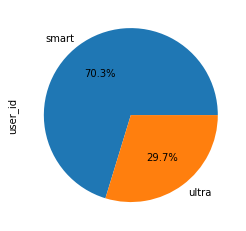

In [39]:
statistic_table = round(table.pivot_table(index='tariff', 
                                          values=['calls_sum', 
                                                  'mb_used', 
                                                  'messages_sent'], 
                                          aggfunc=['sum', 
                                                   'mean', 
                                                   'median']), 2)
display(statistic_table)

statistic_table = table.drop_duplicates(subset='user_id')
statistic_table.groupby('tariff')['user_id']\
               .agg('count')\
               .plot(kind='pie', 
                     autopct='%1.1f%%');

Начнем с того, что количество пользователей тарифа "Smart" 70.3%, больше в два раза чем количество пользователей тарифа "Ultra" 29.7%.

In [40]:
over_call = len(table.query('calls_sum > 500 & tariff == "smart"'))
norm_call = len(table.query('calls_sum <= 500 & tariff == "smart"'))
over_call = round(over_call / (norm_call + over_call) * 100, 2)
print(f'В {over_call}% случаев пользователи тарифа "smart" превысили пакет включенных минут.')

В 33.83% случаев пользователи тарифа "smart" превысили пакет включенных минут.


In [41]:
over_internet = len(table.query('mb_used > 15 & tariff == "smart"'))
norm_internet = len(table.query('mb_used <= 15 & tariff == "smart"'))
over_internet = round(over_internet / (norm_internet + over_internet) * 100, 2)
print(f'В {over_internet}% случаев пользователи тарифа "smart" превысили пакет включенного интернет трафика.')

В 58.5% случаев пользователи тарифа "smart" превысили пакет включенного интернет трафика.


In [42]:
over_messages = len(table.query('messages_sent > 50 & tariff == "smart"'))
norm_messages = len(table.query('messages_sent <= 50 & tariff == "smart"'))
over_messages = round(over_messages / (norm_messages + over_messages)* 100, 2)
print(f'В {over_messages}% случаев пользователи тарифа "smart" превысили пакет включенных СМС сообщений.')

В 62.81% случаев пользователи тарифа "smart" превысили пакет включенных СМС сообщений.


In [43]:
over_internet = len(table.query('mb_used > 30 & tariff == "ultra"'))
norm_internet = len(table.query('mb_used <= 30 & tariff == "ultra"'))
over_internet = round(over_internet / (norm_internet + over_internet) * 100, 2)
print(f'В {over_internet}% случаев пользователи тарифа "Ultra" превысили пакет включенного интернет трафика.')

В 13.6% случаев пользователи тарифа "Ultra" превысили пакет включенного интернет трафика.


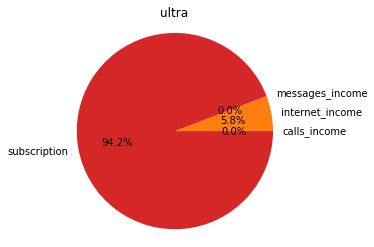

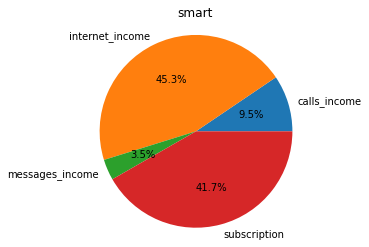

,calls_income,internet_income,messages_income,subscription,total_income
tariff,,,,,
smart,278217.0,1332400,102612.0,1225950,2939179.0
ultra,0.0,118350,0.0,1920750,2039100.0


In [44]:
statistic_table = round(table.pivot_table(index = 'tariff', 
                                    values = ['calls_income',
                                              'messages_income',
                                              'internet_income',
                                              'subscription'], 
                                    aggfunc = 'sum'), 2)

labels = statistic_table.columns
sizes = statistic_table.loc['ultra']
sizes2 = statistic_table.loc['smart']

fig, ax = plt.subplots()
ax.pie(sizes, 
       labels=labels, 
       autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('ultra')

fig, ax1 = plt.subplots()
ax1.pie(sizes2, 
        labels=labels, 
        autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('smart')

plt.show()


statistic_table['total_income'] = (statistic_table['calls_income'] + statistic_table['messages_income' ] +
statistic_table['internet_income'] + statistic_table['subscription' ])

display(statistic_table)

Рассмотрев структуру дохода по тарифам приходим к выводу что доходы компании от тарифа "Ultra" в большинстве своем состоят из ежемесячных платежей по подписке но около 6% доходов состовляют платежи по превышению интернет трафика . Доходы от тарифа "Smart" только на 42% состоят из ежемесячных платежей по подписке и на 45% от платежей по превышению интернет трафика, на 9.5 и 3.5 %-ов от превышения пакета минут и СМС соответсвенно.

,calls_income,internet_income,messages_income,subscription,total_income
tariff,,,,,
smart,125.0,598.0,46.0,550,1319.0
ultra,0.0,120.0,0.0,1950,2070.0


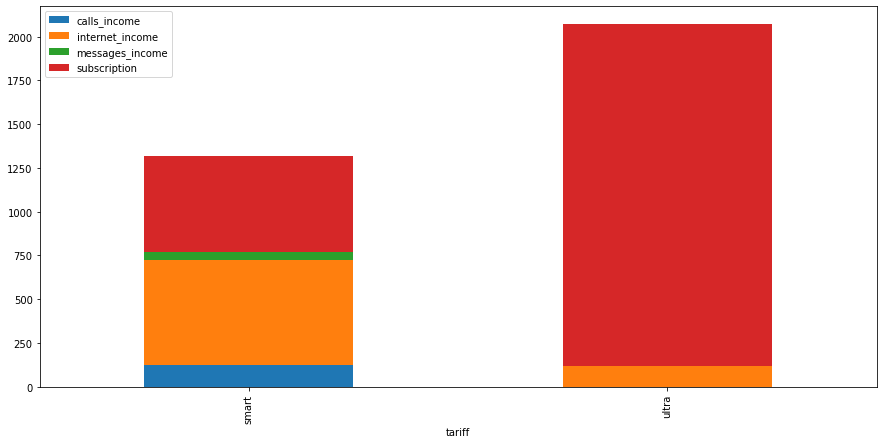

In [45]:
statistic_table = round(table.pivot_table(index = 'tariff', 
                                    values = ['calls_income',
                                              'messages_income',
                                              'internet_income',
                                              'subscription'], 
                                    aggfunc = 'mean'))

statistic_table.plot(kind='bar', 
                     stacked='False', 
                     figsize =(15,7))

statistic_table['total_income'] = (statistic_table['calls_income'] + statistic_table['messages_income' ] +
statistic_table['internet_income'] + statistic_table['subscription' ])
display(statistic_table)

На гистограммах выше, отображена структура среднего месячного платежа по тарифам, средний платеж по трафу "Ultra" выше - 2072 рубля против платежа по тарифу "Smart" 1320 рублей.

,calls_income,internet_income,messages_income,subscription,total_income
tariff,,,,,
smart,278217.0,1332400,102612.0,1225950,2939179.0
ultra,0.0,118350,0.0,1920750,2039100.0


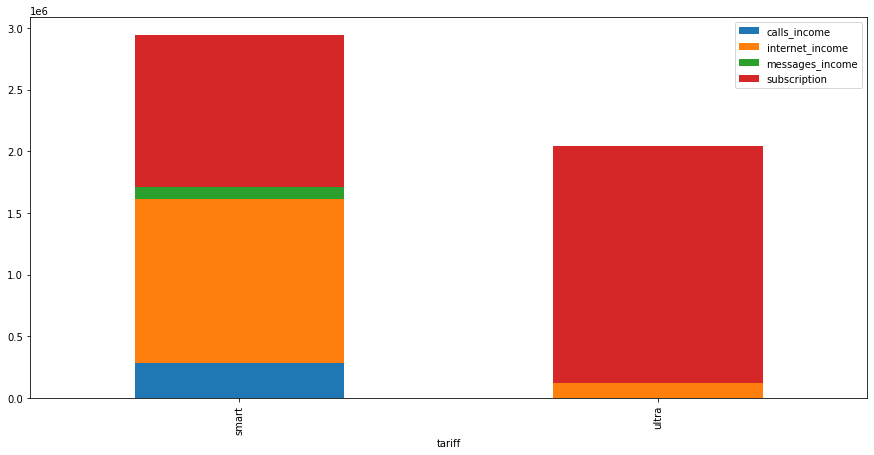

In [46]:
statistic_table = round(table.pivot_table(index = 'tariff', 
                                          values = ['calls_income',
                                                    'messages_income',
                                                    'internet_income',
                                                    'subscription'], 
                                    aggfunc = 'sum'))

statistic_table.plot(kind='bar', 
                     stacked='False', 
                     figsize =(15,7))

statistic_table['total_income'] = (statistic_table['calls_income'] + statistic_table['messages_income' ] +
statistic_table['internet_income'] + statistic_table['subscription' ])
display(statistic_table)

Тариф "smart" в годовом выражении приносит основную часть прибыли по выборке 2.9 млн. руб., тариф "Ultra" всего 2 млн. руб. 

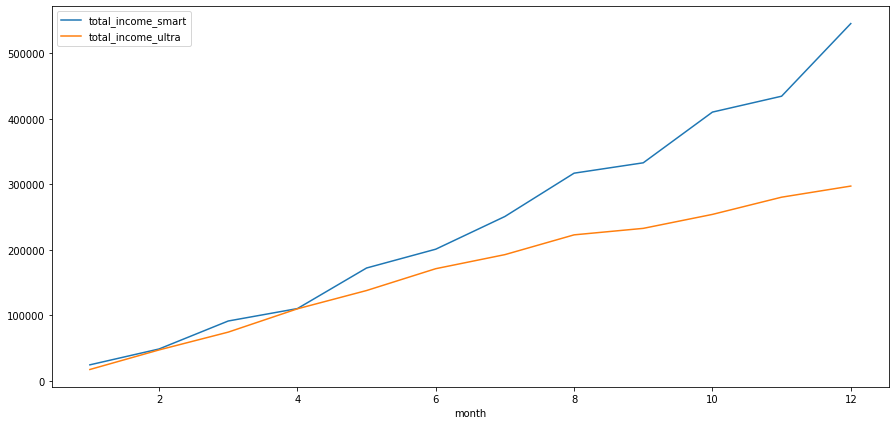

In [51]:
for tariff_name in tariffs['tariff_name']:
    statistic_table = (table[table['tariff'] == tariff_name].groupby('month')['total_income']
                                                            .agg('sum'))
    statistic_table.name = 'total_income_' + tariff_name
    statistic_table.plot(figsize =(15,7), legend=True)

При анализе помесячной выручки в разрезе тарифов, приходи к выводу что тарифы вывели на рынок в начале 2018 г., месячная выручка по тарифу "smart" в течении года более динамично увеличивается по отношению к тарифу "Ultra"

## Гистограммы, среднее количество, дисперсия, стандартное отклонение и описания распределений.

### Сколько минут разговора требуется пользователям каждого тарифа в месяц?

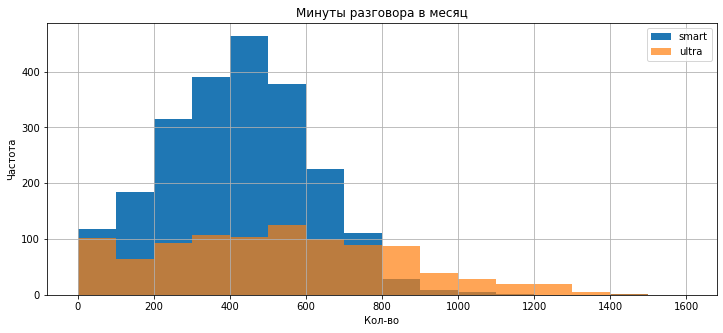

,mean,median,var,std
,calls_sum,calls_sum,calls_sum,calls_sum
tariff,,,,
smart,418.0,422.0,36219.0,190.0
ultra,527.0,518.0,100874.0,318.0


-153.006241260281 988.8761380749961
-426.1949433235718 1479.441643831186


In [52]:
table.loc[table.loc[:,'tariff'] == 'smart']['calls_sum'].plot(kind='hist',
                                                              bins=range(0, 1700, 100),
                                                              label='smart', 
                                                              figsize=(12, 5),
                                                              grid=True)
    
table.loc[table.loc[:,'tariff'] == "ultra"]['calls_sum'].plot(kind='hist',
                                                              bins=range(0, 1700, 100),
                                                              alpha=0.7,
                                                              label='ultra',
                                                              figsize=(12, 5),
                                                              grid=True)
    
plt.title('Минуты разговора в месяц')
plt.legend()
plt.xlabel("Кол-во")
plt.ylabel("Частота")
plt.show()


statistic_table = table.pivot_table(index='tariff', 
                                    values=['calls_sum'], 
                                    aggfunc=['mean', 
                                             'median', 
                                             'var', 
                                             'std'])
display(round(statistic_table))

mean = statistic_table.loc['smart'][('mean', 'calls_sum')]
sigma = statistic_table.loc['smart'][('std', 'calls_sum')]
print(mean - 3 * sigma, mean + 3 * sigma)

mean = statistic_table.loc['ultra'][('mean', 'calls_sum')]
sigma = statistic_table.loc['ultra'][('std', 'calls_sum')]
print(mean - 3 * sigma, mean + 3 * sigma)

На гистограмме плотностей отображено количество минут которое пользователи тарифов "Smart" и "Ultra" выговаривают в течении месяца. В среднем пользователям тарифа "Smart" требуется 419 минут разговорного времени в месяц, большинство пользователей разговаривают от 0 до 986 минут в месяц. Пользовотели тарифа "Ultra" в среднем разговаривают больше, им в месяц в среднем требуется 531 минута разговорного времени, большинство пользователей тарифа разговаривают от 0 до 1486 минут в месяц.

Распределение значений на гистограмме для обоих тарифов имеют симметричное распределение что подтверждается совпадением медианного и среднего значений. Дисперсия у пользователей тарифа "Ultra" более чем в два раза больше чем у пользователей тарифа "Smart".  

### Сколько сообщений требуется пользователям каждого тарифа в месяц?

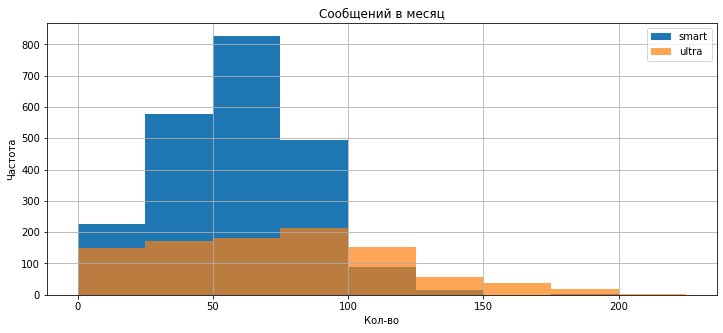

,mean,median,var,std
,messages_sent,messages_sent,messages_sent,messages_sent
tariff,,,,
smart,58.0,60.0,673.0,26.0
ultra,73.0,74.0,1929.0,44.0


-19.35613807361174 136.28301111084818
-58.357666031793244 205.1434528338237


In [53]:
table.loc[table.loc[:,'tariff'] == 'smart']['messages_sent'].plot(kind='hist',
                                                                  bins=range(0, 250, 25),
                                                                  label='smart', 
                                                                  figsize=(12, 5),
                                                                  grid=True)
    
table.loc[table.loc[:,'tariff'] == "ultra"]['messages_sent'].plot(kind='hist',
                                                               bins=range(0, 250, 25),
                                                               alpha=0.7,
                                                               label='ultra',
                                                               figsize=(12, 5),
                                                               grid=True)
    
plt.title('Сообщений в месяц')
plt.legend()
plt.xlabel("Кол-во")
plt.ylabel("Частота")
plt.show()


statistic_table = table.pivot_table(index='tariff', 
                                    values=['messages_sent'], 
                                    aggfunc=['mean', 
                                             'median', 
                                             'var', 
                                             'std'])
display(round(statistic_table))

smart_despertion = statistic_table.loc['smart'][('var', 'messages_sent')]
mean = statistic_table.loc['smart'][('mean', 'messages_sent')]
sigma = np.sqrt(smart_despertion)
print(mean - 3 * sigma, mean + 3 * sigma)

ultra_despertion = statistic_table.loc['ultra'][('var', 'messages_sent')]
mean = statistic_table.loc['ultra'][('mean', 'messages_sent')]
sigma = np.sqrt(ultra_despertion)
print(mean - 3 * sigma, mean + 3 * sigma)

На гистограмме плотностей отображено количество сообщений которое пользователи тарифов "Smart" и "Ultra" отправляют в течении месяца. В среднем пользователям тарифа "Smart" отправляют 60 сообщений в месяц, большинство пользователей отправляют от 0 до 135 сообщений в месяц. Пользовотели тарифа "Ultra" в среднем отправляют больше сообщений, им в месяц в среднем требуется 76 сообщений в месяц, большинство пользователей тарифа отправляют от 0 до 203 сообщений в месяц.

Распределение значений на гистограмме для обоих тарифов имеют симметричное распределение что подтверждается совпадением медианного и среднего значений. Дисперсия у пользователей тарифа "Ultra" примерно в три раза больше чем у пользователей тарифа "Smart".  

### Какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

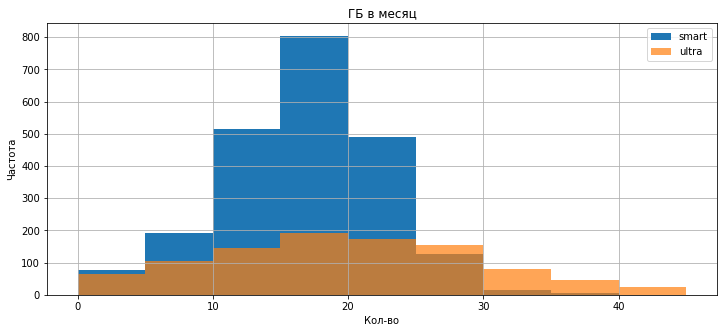

,mean,median,var,std
,mb_used,mb_used,mb_used,mb_used
tariff,,,,
smart,16.0,17,33.0,6.0
ultra,19.0,19,97.0,10.0


-0.9123346889277997 33.570028722126544
-10.066117858876048 49.05495034618569


In [54]:
table.loc[table.loc[:,'tariff'] == 'smart']['mb_used'].plot(kind='hist',
                                                                  bins=range(0, 50, 5),
                                                                  label='smart', 
                                                                  figsize=(12, 5),
                                                                  grid=True)
    
table.loc[table.loc[:,'tariff'] == "ultra"]['mb_used'].plot(kind='hist',
                                                               bins=range(0, 50, 5),
                                                               alpha=0.7,
                                                               label='ultra',
                                                               figsize=(12, 5),
                                                               grid=True)
    
plt.title('ГБ в месяц')
plt.legend()
plt.xlabel("Кол-во")
plt.ylabel("Частота")
plt.show()


statistic_table = table.pivot_table(index='tariff', 
                                    values=['mb_used'], 
                                    aggfunc=['mean', 
                                             'median', 
                                             'var', 
                                             'std'])
display(round(statistic_table))

smart_despertion = statistic_table.loc['smart'][('var', 'mb_used')]
mean = statistic_table.loc['smart'][('mean', 'mb_used')]
sigma = np.sqrt(smart_despertion)
print(mean - 3 * sigma, mean + 3 * sigma)

ultra_despertion = statistic_table.loc['ultra'][('var', 'mb_used')]
mean = statistic_table.loc['ultra'][('mean', 'mb_used')]
sigma = np.sqrt(ultra_despertion)
print(mean - 3 * sigma, mean + 3 * sigma)

На гистограмме плотностей отображено количество ГБ интернет трафика которое пользователи тарифов "Smart" и "Ultra" используют в течении месяца. В среднем пользователям тарифа "Smart" используют 16 ГБ трафика в месяц - что превышает объем предоплаченного пакета в тарифе, пользователи используют от 0 до 33 ГБ трафика в месяц. Пользовотели тарифа "Ultra" в используют больше трафика в месяц, им в месяц в среднем требуется 19 ГБ трафика в месяц, пользователей тарифа используют от 0 до 48 ГБ трафика в месяц.

Распределение значений на гистограмме для обоих тарифов имеют симметричное распределение что подтверждается совпадением медианного и среднего значений. Дисперсия у пользователей тарифа "Ultra" примерно в три раза больше чем у пользователей тарифа "Smart".  

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для проверки гипотезы сформулируем нулевую гипотезу:

 Cредние выручки пользователей тарифов «Ультра» и «Смарт» равны.
 
 
 В качестве альтернативной гипотезы будем рассматривать:
 
 Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
 
 Проверим нулевую гипотезу:

In [55]:
alpha = 0.05
income_ultra = table.loc[table.loc[:,'tariff'] == 'ultra']['total_income']
income_smart = table.loc[table.loc[:,'tariff'] == 'smart']['total_income']
result = st.ttest_ind(income_smart,income_ultra) 
prob = result.pvalue
print("p-значение:{}".format(prob))
if prob < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось нулевую гипотезу")

p-значение:1.1750365682247308e-144
Отвергаем нулевую гипотезу


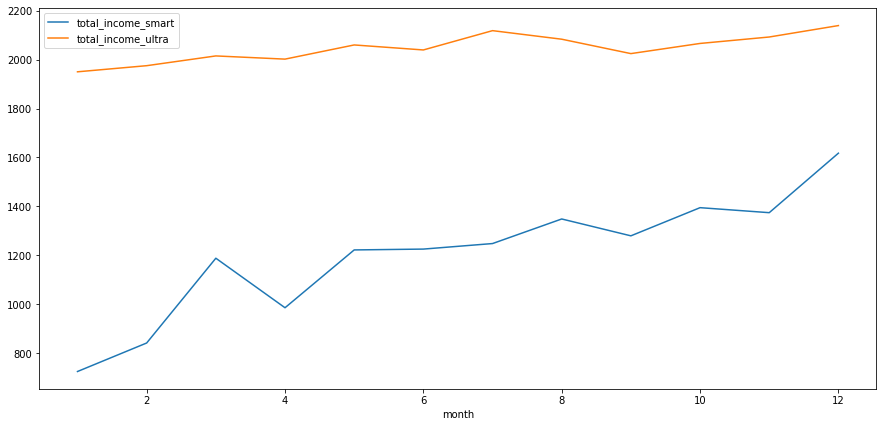

In [57]:
for tariff_name in tariffs['tariff_name']:
    statistic_table = (table[table['tariff'] == tariff_name].groupby('month')['total_income']
                     .agg('mean'))
    statistic_table.name = 'total_income_' + tariff_name
    statistic_table.plot(figsize =(15,7), legend=True)

Вывод: мы отвергли нулевую гипотезу, а это означает что гипотеза о том что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются имеет место быть. Также на графике изменения средней выручки по месяцам в разрезе тарифов - данные не противоречат нашему выводу.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [58]:
city_moscow = table.loc[table.loc[:,'city'] == 'Москва']['total_income']
city_other = table.loc[table.loc[:,'city'] != 'Москва']['total_income']
result_city = st.ttest_ind(city_moscow,city_other,equal_var=False) 
prob_city = result_city.pvalue
print("p-значение:{}".format(prob_city))
if prob_city < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:0.5305308576929098
Не получилось отвергнуть нулевую гипотезу


<AxesSubplot:xlabel='month'>

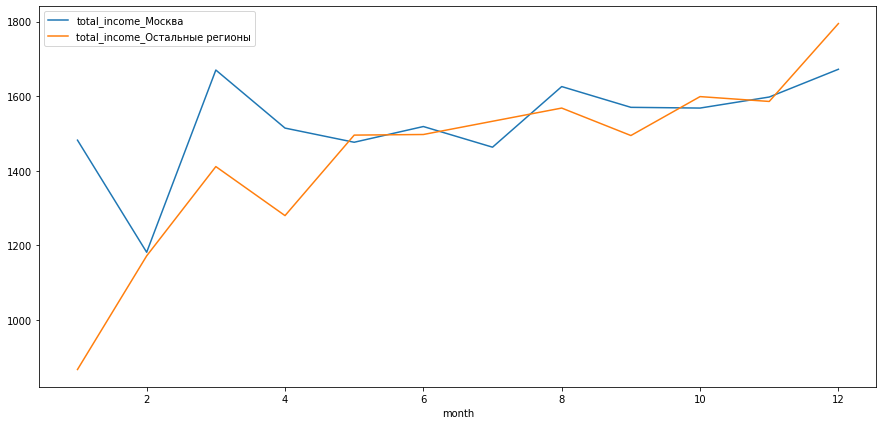

In [59]:
statistic_table = (table[table['city'] == 'Москва'].groupby('month')['total_income']
                                                   .agg('mean'))
statistic_table.name = 'total_income_' + 'Москва'
statistic_table.plot(figsize =(15,7), legend=True)
statistic_table = (table[table['city'] != 'Москва'].groupby('month')['total_income']
                                                   .agg('mean'))
statistic_table.name = 'total_income_' + 'Остальные регионы'
statistic_table.plot(figsize =(15,7), legend=True)

Вывод: у нас не получилось отвергнуть нулевую гипотезу, а это означает что гипотеза о том что: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов опровергнута. Что также подтверждается графиками гистограммы расположенной выше, хотя в начале года мы наблюдаем некоторые различия но как мы выяснили ранее - начало года совпадает с становление тарифов и число пользователей в начале года мало чтобы влиять на общую статистику.

## Общий вывод

В этом проекте мы попытались дать рекамендацию: На какой тарифный план стоит распределить рекламный бюджет?. Для начала мы открыли предоставленные датасеты и ознакомились с данными. Привели данные к подходящим типам и единицам измерения. Затем мы проанализировали поведение типичного пользователя тарифов "Smart" и "Ultra", установили что пользователей тарифа "Smart" большинство и они часто превышают квоты предоплаченных пакетов: минут, сообщений и интернета. В свою очередь пользователи тарифа "Ultra" не успевают выбирать предоплаченные минуты и сообщения, но все же некоторым пользователям не хватает пакета интернета. 

Перед нами также стояла задача о проверке двух гипотез. Гипотеза о том что: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются - не опровергнута. А гипотеза о том что: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - не подтвердилась.

Рекомендация для коммерческого департамента - рекламный бюджет стоит направить на тариф "smart", по тарифу "smart" более динамично растет выручка в течении года, также платежи по этому тарифу приносят основную часть доходов компании, причем платежи по этому тарифу состоят в основном из платежей превышения предоплаченного пакета интернет трафика 45.3 %, платежей по месячной абонентской платы 41.7 %, платежей превышения пакета минут 9.5%, платежей превышения пакета сообщений 3.5%